# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Dados estruturados e não estruturados e problemas típicos em bases de dados</span>


## <span style="color:darkred">Problemas típicos em bases de dados: Informações faltantes</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

---

## Problemas típicos em bases de dados

* bases de dados, ainda que estruturadas, possuem problemas
* a regra 80/20 diz que **80%** do tempo dos cientistas de dados é gasto **encontrando, limpando e organizando dados**

    https://www.ibm.com/cloud/blog/ibm-data-catalog-data-scientists-productivity
    
<img src="./imagens/ibm-8020rule.png" alt="drawing" width="700"/>

* *não reconhecer esses problemas e ignorá-los pode levar a conclusões erradas na fase de análise.*



## Informações faltantes (*missing data*)


#### Razões para dados faltantes

A maior causa da existência de dados faltantes está no projeto do protocolo de *coleta de dados* e na sua execução.

Podemos observar as seguintes fontes de dados faltantes:

* Omissão / não preenchimento de campo:
    * usuário esqueceu
    * usuário escolheu não preencher por não saber como preencher
    * usuário preferiu não preencher com receio da interpretação da resposta
    
    
* Dados perdidos: 
    * na digitação (em papel ou digital), 
    * na transferência de dados 
    * na migração de bases de dados 
    * na conversão entre formatos de arquivos    
    
    
* Erro de programação



### Tipo do dado faltante

Seja $V$ o conjunto de todas as observações em um conjunto de dados. 

$V$ é particionado em $V_c$ e $V_m$, sendo que:
* $V_c \subseteq V$ são as observações completas em todos os campos/atributos,
* $V_m \subseteq V$ são as observações com ao menos um campo/atributo faltante (*missing*),

---

> Estabelecer a origem dos dados faltantes e sua causa pode ser importante, e só é completamente possível com auxílio de especialistas no domínio ou negócio

---

#### MCAR - missing completely at random

**Faltantes completamente aleatórios**
- a probabilidade de $V_m$ ser faltante é independente de $V_m$ e independente de qualquer outra observação $X \in V_c$ no dataset;
- caso em que qualquer dado tem a mesma chance de estar faltando;

*Exemplo*: ao avaliar um produto os clientes decidem reportar ou não a sua satisfação jogando cara-ou-coroa;

*Nesse caso:* $V_c$ são uma amostra representativa de todas as outras, e podem ser usadas para completar $V_m$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_mcar = pd.read_csv("./dados/TACTD-01-Faltantes_MCAR.csv", sep=',', header=0)

print("Número de observacoes na base de dados: ", data_mcar.shape[0])
data_mcar[:10]

Número de observacoes na base de dados:  30


,e-mail,Name,Sex,Rate
0,eug_ewell@live.com,Eugenio Ewell,M,NaN
1,NaN,Ivo Izidro,M,5.0
2,multiplx@mac.com,Lindsey Lever,NaN,3.0
3,bader@sbcglobal.net,Desiree Dardar,F,NaN
4,nasarius@aol.com,Mariann Mulero,F,3.0
5,jusdisgi@outlook.com,Kathey Kleiman,F,4.0
6,rrollison@aol.com,Rupert Rollison,M,2.0
7,seymoress@aol.com,Signe Seymore,F,NaN
8,loralemo@gmail.com,Lora Lemoine,F,4.0
9,NaN,Leanne Lowy,F,4.0


Digamos que estamos interessados nas avaliacoes realizadas, ou seja "Rate", vamos ver as estatísticas descritivas desse atributo

In [2]:
data_mcar['Rate'].describe()

count    24.000000
mean      3.500000
std       1.215838
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Rate, dtype: float64

Mas sabemos que há dados faltantes, então vamos olhar especificamente para eles

In [3]:
# observando os dados de avaliacoes que sao nulos
data_mcar[data_mcar['Rate'].isnull()]

,e-mail,Name,Sex,Rate
0,eug_ewell@live.com,Eugenio Ewell,M,NaN
3,bader@sbcglobal.net,Desiree Dardar,F,NaN
7,seymoress@aol.com,Signe Seymore,F,NaN
13,cobree@aol.com,Carlos Cobre,M,NaN
18,agapow@comcast.net,Ricardo Rima,M,NaN
24,NaN,Herta Hatley,NaN,NaN


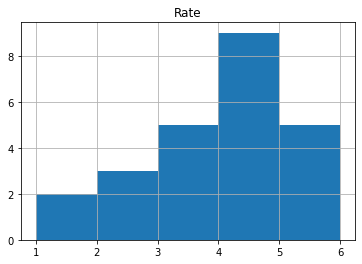

In [4]:
# olhando para a distribuicao dos dados...
hist = data_mcar.hist(bins=np.arange(1,7))

Aparentemente, não há uma causa dos dados faltantes, então é provável um cenário **MCAR**, para o qual existem várias técnicas disponíveis para minimizar o efeito de dados faltantes.

Note que $V_m$, mostradas acima não parece ter qualquer relação com os valores de $V_m$ nem com outras variáveis $V_c$ observadas.

---

#### MAR : missing at random

**Faltantes (condicionalmente) aleatórios**:
- a probabilidade de $V_m$ ser faltante é independente de $V_m$, mas
- está relacionada a outras variáveis $V_c$ (para os quais há dados disponíveis) no dataset;

*Exemplo*: ao revisar um serviço contratado online, *homens* tendem a omitir a satisfação sobre o serviço, mas isso **não** tem relação com seu nível de satisfação,

*Nesse caso:* $V_c$ são uma amostra representativa apenas para certo conjunto de observações,



In [5]:
data_mar = pd.read_csv("./dados/TACTD-01-Faltantes_MAR.csv")

data_mar[data_mar['Rate'].isna()]

,e-mail,Name,Sex,Rate
1,iizi@yahoo.ca,Ivo Izidro,M,NaN
12,kk@verizon.net,Kraig Kriner,M,NaN
18,agapow@comcast.net,Ricardo Rima,M,NaN
23,joelw@live.com,Elias Elmo,M,NaN
25,jaju@mac.com,Jada Judon,M,NaN
27,njpayne@comcast.net,Lillian Labree,F,NaN


Observar os dados visualmente pode não significar muito... vamos usar estatística descritiva e depois olhar apenas para os dados faltantes

In [6]:
data_mar.describe()

,Rate
count,24.000000
mean,3.666667
std,1.007220
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


In [7]:
# criando um dataframe para visualizar lado a lado a estatística descritiva
df_descr = data_mar.describe()

In [8]:
df_descr['Rate_F'] = data_mar[data_mar['Sex']=='F'].describe()
df_descr['Rate_M'] = data_mar[data_mar['Sex']=='M'].describe()

In [9]:
df_descr

,Rate,Rate_F,Rate_M
count,24.000000,17.000000,7.000000
mean,3.666667,3.705882,3.571429
std,1.007220,1.046704,0.975900
min,1.000000,1.000000,2.000000
25%,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000


--- 
#### MNAR: missing not at random

**Faltantes não aleatórios** ou respostas não ignoráveis
- origem quando descartamos MCAR e MAR;
- o valor da variável faltante é a razão pela qual ela está faltando;
    
*Exemplo*: ao revisar um produto comprado, clientes tendem a omitir o nível satisfação com o produto **devido** ao nível de satisfação,

*Nesse caso:* ?



In [10]:
data_nr = pd.read_csv("./dados/TACTD-01-Faltantes_NonRandom.csv")

data_nr.head(8)

,e-mail,Name,Sex,Rate
0,eug_ewell@live.com,Eugenio Ewell,M,4.0
1,iizi@yahoo.ca,Ivo Izidro,M,5.0
2,multiplx@mac.com,Lindsey Lever,M,3.0
3,bader@sbcglobal.net,Desiree Dardar,F,NaN
4,nasarius@aol.com,Mariann Mulero,F,NaN
5,jusdisgi@outlook.com,Kathey Kleiman,F,4.0
6,rrollison@aol.com,Rupert Rollison,M,NaN
7,seymoress@aol.com,Signe Seymore,F,3.0


In [11]:
data_nr.describe()

,Rate
count,22.000000
mean,4.090909
std,0.750180
min,3.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [12]:
data_nr[data_nr['Rate'].isnull()]

,e-mail,Name,Sex,Rate
3,bader@sbcglobal.net,Desiree Dardar,F,NaN
4,nasarius@aol.com,Mariann Mulero,F,NaN
6,rrollison@aol.com,Rupert Rollison,M,NaN
11,danzigism@aol.com,Mayra Mcnish,F,NaN
13,cobree@aol.com,Carlos Cobre,M,NaN
20,temmink@icloud.com,Willene Wolfgram,F,NaN
26,tubajon@sbcglobal.net,Joelle Jaffee,F,NaN
29,dfevre@optonline.net,Douglas Damario,M,NaN


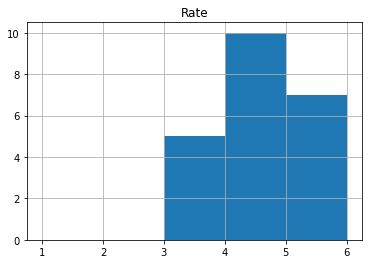

In [13]:
# olhando para a distribuicao dos dados...
hist = data_nr.hist(bins=np.arange(1,7))

## Resumo e considerações finais

Bases de dados reais possuem problemas relacionados à coleta que não podem ser negligenciados

Parte importante do trabalho do cientista de dados é reconhecer esses problemas

**Dados faltantes** é um desses problemas e pode ocorrer em três tipos principais
* Completamente Aleatório - MCAR
* Aleatório (condicionalmente) - MAR
* Não aleatório

A abordagem para tratar cada caso deve ser diferente!

> Análise dos dados pode indicar a origem *mais provável*, mas apenas com conhecimento do domínio e do negócio é possível determinar de forma definitiva a causa